## Developing Model for Perdicting Car Price

TODO(Intro)
- In this project we are going to develope model using linear regression for perdicting car prices
- we are provided with an data set consists all the aspect of car("engine-size","fuel-  system","bore","stroke","compression-ratio","horsepower",etc...) 
- And we are going to perform Feauture Analysis on these data set

Here are the step to follow:

- We are using to use python and some of its library for this.
- First we are going  to import data set and going to read it.
- Next we are going to perform Exploratory Data Analysis on the data
- We are going to visualize all the key metrics of the data
- Finally we are going to develope model form the data 

In [38]:
# This are Python Library we are going to use

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import Ridge
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV

In [39]:
## Here is the link to the data set we are going  to read

path = r"https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
dfs = pd.read_csv(path, header =  None)
dfs

headers = ["symboling","normalized-losses","make", "fuel-type","aspiration","num-of-doors","body-style",
           "drive-wheels","engine-location","wheel-base","length","width","height","curb-weight","engine-type",
           "num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio","horsepower","peak-rpm",
           "city-mpg","highway-mpg","price"]
dfs.columns= headers
dfs.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [40]:
print(dfs.columns)

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')


In [44]:
# Looking into data types of dataset

dfs.describe(include = 'all')


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [42]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [45]:
# Replacing un wanted data(spaces, '?') with Nan 

dfs1 = dfs.replace('?', np.NaN)  
dfs1.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [47]:
# Finding missing value and replacing it with the mean value
missing_data = df.isnull()
missing_data.head()


,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-l/100km,highway-mpg,price,sapiration_std,aspiration_turbo,price_binned
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [48]:
for x in missing_data.columns.tolist():
    print(x)
    print(missing_data[x].value_counts())

symboling
False    201
Name: symboling, dtype: int64
normalized-losses
False    201
Name: normalized-losses, dtype: int64
make
False    201
Name: make, dtype: int64
fuel-type
False    201
Name: fuel-type, dtype: int64
num-of-doors
False    201
Name: num-of-doors, dtype: int64
body-style
False    201
Name: body-style, dtype: int64
drive-wheels
False    201
Name: drive-wheels, dtype: int64
engine-location
False    201
Name: engine-location, dtype: int64
wheel-base
False    201
Name: wheel-base, dtype: int64
length
False    201
Name: length, dtype: int64
width
False    201
Name: width, dtype: int64
height
False    201
Name: height, dtype: int64
curb-weight
False    201
Name: curb-weight, dtype: int64
engine-type
False    201
Name: engine-type, dtype: int64
num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64
engine-size
False    201
Name: engine-size, dtype: int64
fuel-system
False    201
Name: fuel-system, dtype: int64
bore
False    201
Name: bore, dtype: int64
stroke
False

# Changing data type and replacing or deleting the Nan value 

In [61]:



avg_norm_loss = df['normalized-losses'].astype('float').mean(axis = 0)
avg_norm_loss

df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace = True)


In [62]:
avg_bore = df['bore'].astype('float').mean(axis = 0)
avg_bore
df['bore'].replace(np.nan, avg_bore, inplace = True)


In [63]:
avg_stroke= df['stroke'].astype('float').mean(axis = 0)
avg_stroke

df['stroke'].replace(np.nan, avg_stroke, inplace = True)

In [64]:
avg_horsepower= df['horsepower'].astype('float').mean(axis = 0)
avg_stroke

df['horsepower'].replace(np.nan, avg_horsepower, inplace = True)


In [65]:
avg_peakrpm= df['peak-rpm'].astype('float').mean(axis = 0)
avg_stroke

df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace = True)

In [66]:
df['num-of-doors'].value_counts().idxmax()
df['num-of-doors'].replace(np.nan, 'four', inplace = True)

In [67]:
df[['bore', 'stroke']] = df[['bore', 'stroke']].astype('float')
df[['normalized-losses']] = df[['normalized-losses']].astype('int')
df['price'] = df['price'].astype('float')
df['peak-rpm'] = df['peak-rpm'].astype('float')

In [70]:
# Dropping Nan values of the price column

df = df.dropna(subset=["price"],axis =0)
df.head(5)
df["price"]= df['price'].astype("int64")
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [69]:
# Checking missing value now we have clean all the missing value from the dataset


missing_data = df.isnull()
missing_data.head()

for x in missing_data.columns.tolist():
    print(x)
    print(missing_data[x].value_counts())

symboling
False    201
Name: symboling, dtype: int64
normalized-losses
False    201
Name: normalized-losses, dtype: int64
make
False    201
Name: make, dtype: int64
fuel-type
False    201
Name: fuel-type, dtype: int64
aspiration
False    201
Name: aspiration, dtype: int64
num-of-doors
False    201
Name: num-of-doors, dtype: int64
body-style
False    201
Name: body-style, dtype: int64
drive-wheels
False    201
Name: drive-wheels, dtype: int64
engine-location
False    201
Name: engine-location, dtype: int64
wheel-base
False    201
Name: wheel-base, dtype: int64
length
False    201
Name: length, dtype: int64
width
False    201
Name: width, dtype: int64
height
False    201
Name: height, dtype: int64
curb-weight
False    201
Name: curb-weight, dtype: int64
engine-type
False    201
Name: engine-type, dtype: int64
num-of-cylinders
False    201
Name: num-of-cylinders, dtype: int64
engine-size
False    201
Name: engine-size, dtype: int64
fuel-system
False    201
Name: fuel-system, dtype: int64


# Normalising the data set

- Normalising is the process of organising the data entries to ensure they appear similiar across
  all fields and records, making informatiom easier to find group and analyae

In [71]:
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()
df['length'] = df['length']/df['length'].max()

df[['width', 'height','length']]

,width,height,length
0,0.890278,0.816054,0.811148
1,0.890278,0.816054,0.811148
2,0.909722,0.876254,0.822681
3,0.919444,0.908027,0.848630
4,0.922222,0.908027,0.848630
...,...,...,...
200,0.956944,0.928094,0.907256
201,0.955556,0.928094,0.907256
202,0.956944,0.928094,0.907256
203,0.956944,0.928094,0.907256


# changing categorical value of the data set

- Fule_typeand Aspiration has categorical value. Hence categorical not going help in feature analysis

- So chaning it inti quantitive value to furthur analysis

In [72]:


dummy_variable = pd.get_dummies(df['fuel-type'])
dummy_variable.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [73]:
dums =dummy_variable.rename(columns={'gas': 'fuel-type-gas', 'diesel' : 'fuel-type-diesel'})

In [74]:
df = pd.concat([df, dummy_variable], axis = 1)
df.drop('fuel-type', axis = 1, inplace = True)
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,3.47,2.68,9.0,111,5000.0,21,27,13495,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,3.47,2.68,9.0,111,5000.0,21,27,16500,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,2.68,3.47,9.0,154,5000.0,19,26,16500,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.19,3.40,10.0,102,5500.0,24,30,13950,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.19,3.40,8.0,115,5500.0,18,22,17450,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,3.78,3.15,9.5,114,5400.0,23,28,16845,0,1
201,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,3.78,3.15,8.7,160,5300.0,19,25,19045,0,1
202,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,3.58,2.87,8.8,134,5500.0,18,23,21485,0,1
203,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,3.01,3.40,23.0,106,4800.0,26,27,22470,1,0


In [75]:
df.drop(['diesel','gas'], axis = 1, inplace = True)

In [76]:
dummy_data =  pd.get_dummies(df['aspiration'])
dummy_data

m =dummy_data.rename(columns= {"std":"sapiration_std", "turbo":"aspiration_turbo" })
m

,sapiration_std,aspiration_turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
200,1,0
201,0,1
202,1,0
203,0,1


In [77]:

df= pd.concat([df, m], axis = 1)
df

df.drop('aspiration', axis = 1, inplace = True)

df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,sapiration_std,aspiration_turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,3.47,2.68,9.0,111,5000.0,21,27,13495,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,3.47,2.68,9.0,111,5000.0,21,27,16500,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,2.68,3.47,9.0,154,5000.0,19,26,16500,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,3.19,3.40,10.0,102,5500.0,24,30,13950,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,3.19,3.40,8.0,115,5500.0,18,22,17450,1,0


In [78]:
# Now we are going differentiate price value as High, low, Medium in our data set

bins = np.linspace(min(df['price']), max(df['price']),4)
group_name = ['low', 'medium', 'high']
df['price_binned'] = pd.cut(df['price'], bins, labels = group_name, include_lowest = True)
df

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,sapiration_std,aspiration_turbo,price_binned
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,2.68,9.0,111,5000.0,21,27,13495,1,0,low
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,2.68,9.0,111,5000.0,21,27,16500,1,0,low
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,3.47,9.0,154,5000.0,19,26,16500,1,0,low
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,3.40,10.0,102,5500.0,24,30,13950,1,0,low
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,3.40,8.0,115,5500.0,18,22,17450,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,3.15,9.5,114,5400.0,23,28,16845,1,0,low
201,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.955556,...,3.15,8.7,160,5300.0,19,25,19045,0,1,medium
202,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,2.87,8.8,134,5500.0,18,23,21485,1,0,medium
203,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,3.40,23.0,106,4800.0,26,27,22470,0,1,medium


In [105]:
# Grouping data between drive wheel and engine tpe

df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [109]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels'  : 'value_counts'}, inplace = True)

drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [110]:
engine_loc_counts  = df['engine-location'].value_counts().to_frame() 
engine_loc_counts.rename(columns = {'engine-location' : 'value_counts'}, inplace = True)
engine_loc_counts 
engine_loc_counts .index.name = 'engine-location' 
engine_loc_counts 

,value_counts
engine-location,
front,198
rear,3


In [102]:
# grouping the data set

df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [111]:
df_group_one = df[['drive-wheels','engine-location', 'price']]
df_group_one = df_group_one.groupby(['drive-wheels','engine-location'],as_index = False).mean()
df_group_one

,drive-wheels,engine-location,price
0,4wd,front,10241.000000
1,fwd,front,9244.779661
2,rwd,front,19142.180556
3,rwd,rear,34528.000000


In [114]:
# Pivot 

group_pivot = df_group_one.pivot(index = 'drive-wheels', columns= 'engine-location')
group_pivot

price         
engine-location         front     rear
drive-wheels                          
4wd              10241.000000      NaN
fwd               9244.779661      NaN
rwd              19142.180556  34528.0

In [115]:
group_pivot = group_pivot.fillna(0)
group_pivot

price         
engine-location         front     rear
drive-wheels                          
4wd              10241.000000      0.0
fwd               9244.779661      0.0
rwd              19142.180556  34528.0

In [116]:
df_group2 = df[['body-style', 'price']]
df_group2 = df_group2.groupby(['body-style'], as_index = False).mean()
df_group2

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


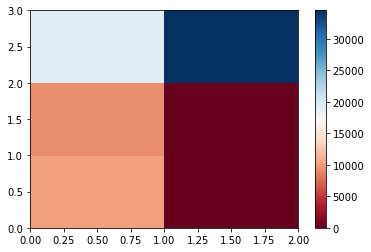

In [117]:
plt.pcolor(group_pivot, cmap = "RdBu")
plt.colorbar()
plt.show()

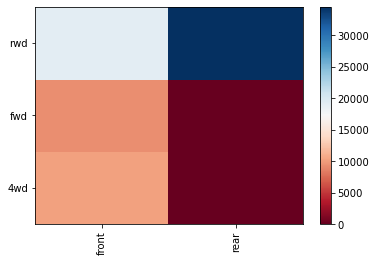

In [118]:
fig, ax = plt.subplots()
im = ax.pcolor(group_pivot, cmap ='RdBu')

row_label = group_pivot.columns.levels[1]
col_label =  group_pivot.index

ax.set_xticks(np.arange(group_pivot.shape[1]) + 0.5, minor = False)
ax.set_yticks(np.arange(group_pivot.shape[0]) + 0.5, minor = False)

ax.set_xticklabels(row_label, minor = False)
ax.set_yticklabels(col_label, minor = False)

plt.xticks(rotation = 90)
fig.colorbar(im)
plt.show()

# Descriptive Statistcs

# Correlation Matrix and Visualization


- correlation is a measure of the relation  between two variable

- The resulting co-efficient is a value  between -1 to  1

- 1 -perfect positive corr
- 0 - no linear corr
- (-1) perfect neagtive corr

In [79]:

df[['bore', 'stroke', 'compression-ratio','horsepower', 'engine-size']].corr()

,bore,stroke,compression-ratio,engine-size
bore,1.000000,-0.055390,0.001250,0.572516
stroke,-0.055390,1.000000,0.187854,0.205806
compression-ratio,0.001250,0.187854,1.000000,0.028889
engine-size,0.572516,0.205806,0.028889,1.000000


In [80]:
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


In [81]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price,sapiration_std,aspiration_turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.139896,-0.007992,-0.182196,0.279719,-0.035527,0.036233,-0.082391,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029800,0.055127,-0.114713,0.239544,-0.225016,-0.181877,0.133999,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493203,0.157964,0.250313,-0.360233,-0.470606,-0.543304,0.584642,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608941,0.123913,0.159733,-0.286035,-0.665192,-0.698142,0.690628,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544879,0.188814,0.189867,-0.245852,-0.633531,-0.680635,0.751265,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180327,-0.060822,0.259737,-0.309913,-0.049800,-0.104812,0.135486,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644041,0.167412,0.156433,-0.279350,-0.749543,-0.794889,0.834415,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572516,0.205806,0.028889,-0.256753,-0.650546,-0.679571,0.872335,-0.110040,0.110040
bore,-0.139896,-0.029800,0.493203,0.608941,0.544879,0.180327,0.644041,0.572516,1.000000,-0.055390,0.001250,-0.267338,-0.582121,-0.591390,0.543154,-0.227782,0.227782
stroke,-0.007992,0.055127,0.157964,0.123913,0.188814,-0.060822,0.167412,0.205806,-0.055390,1.000000,0.187854,-0.063720,-0.034079,-0.034741,0.082267,-0.218190,0.218190


<AxesSubplot:xlabel='engine-size', ylabel='price'>

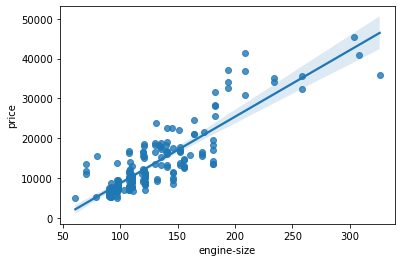

In [82]:
# Visualising the correlation between engine_size and price


sns.regplot(data =df, x ='engine-size', y='price')

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

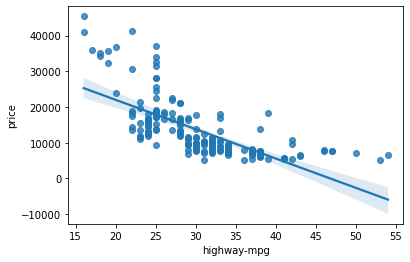

In [83]:
# Visualising the correlation between highway_mpg and price


sns.regplot(data =df , x= 'highway-mpg', y = 'price')

In [84]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

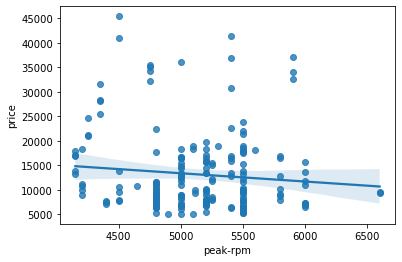

In [86]:
# Visualising the correlation between peak-rpm and price

sns.regplot(data =df , x = 'peak-rpm', y='price')

In [87]:
df[['stroke', 'price']].corr()

,stroke,price
stroke,1.000000,0.082267
price,0.082267,1.000000


<AxesSubplot:xlabel='stroke', ylabel='price'>

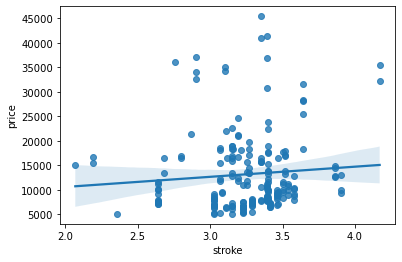

In [89]:
# Visualising the correlation between stroke and price

sns.regplot(data =df, x = 'stroke', y ='price')

- From the correlation  matrix we can say that engine size has a better correlation with the price
- when the engine type changes the price also increases

<AxesSubplot:xlabel='body-style', ylabel='price'>

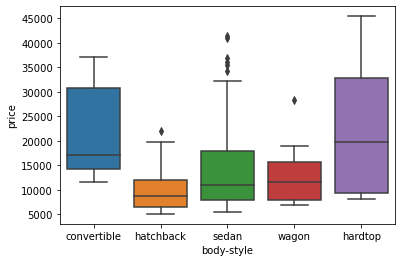

In [91]:
# Creating a box plot to check the ouliers between body_style and price 

sns.boxplot(data = df, x = "body-style", y = 'price')

<AxesSubplot:xlabel='engine-location', ylabel='price'>

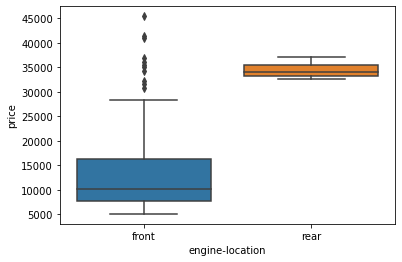

In [94]:
# Creating a box plot to check the ouliers between engine-location and price 

sns.boxplot(data = df, x = 'engine-location', y = 'price')

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

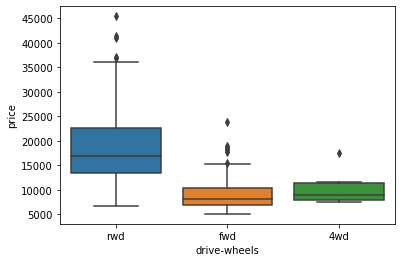

In [95]:
# Creating a box plot to check the ouliers between engine_wheel and price 

sns.boxplot(x='drive-wheels', y='price', data =df)

In [96]:


df.describe(include = 'all')



,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,sapiration_std,aspiration_turbo,price_binned
count,201.000000,201.00000,201,201,201,201,201,201.000000,201.000000,201.000000,...,201.000000,201.000000,201,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201
unique,NaN,NaN,22,2,5,3,2,NaN,NaN,NaN,...,NaN,NaN,59,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,toyota,four,sedan,fwd,front,NaN,NaN,NaN,...,NaN,NaN,68,NaN,NaN,NaN,NaN,NaN,NaN,low
freq,NaN,NaN,32,115,94,118,198,NaN,NaN,NaN,...,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,171
mean,0.840796,122.00000,NaN,NaN,NaN,NaN,NaN,98.797015,0.837102,0.915126,...,3.256904,10.164279,NaN,5117.587940,25.179104,30.686567,13207.129353,0.820896,0.179104,NaN
std,1.254802,31.99625,NaN,NaN,NaN,NaN,NaN,6.066366,0.059213,0.029187,...,0.316048,4.004965,NaN,478.113178,6.423220,6.815150,7947.066342,0.384397,0.384397,NaN
min,-2.000000,65.00000,NaN,NaN,NaN,NaN,NaN,86.600000,0.678039,0.837500,...,2.070000,7.000000,NaN,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,NaN
25%,0.000000,101.00000,NaN,NaN,NaN,NaN,NaN,94.500000,0.801538,0.890278,...,3.110000,8.600000,NaN,4800.000000,19.000000,25.000000,7775.000000,1.000000,0.000000,NaN
50%,1.000000,122.00000,NaN,NaN,NaN,NaN,NaN,97.000000,0.832292,0.909722,...,3.290000,9.000000,NaN,5117.587940,24.000000,30.000000,10295.000000,1.000000,0.000000,NaN
75%,2.000000,137.00000,NaN,NaN,NaN,NaN,NaN,102.400000,0.881788,0.925000,...,3.410000,9.400000,NaN,5500.000000,30.000000,34.000000,16500.000000,1.000000,0.000000,NaN




# Pearson Corr
- The p value is the probability value that the correlation between 2 var is stat significant

- we have a significane level of 0.05, which means we are 95% confident that the corr between the matrix is significant

- p < 0.001 we say strong corr
- p<0.05 we say moderate corr
- p<0.1 we say weak corr
- p>0.1 no corr

In [119]:
# Pearson coefficient

pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df["price"])
print('the pearson correlation is', pearson_coef, "with the p value =", p_value)

the pearson correlation is 0.5846418222655083 with the p value = 8.076488270732873e-20


In [120]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'].astype('float'), df["price"])
print('the pearson correlation is', pearson_coef, "with the p value =", p_value)

the pearson correlation is 0.8096811975632288 with the p value = 6.058444649710002e-48


In [121]:
pearson_coef, p_value = stats.pearsonr(df['length'], df["price"])
print('the pearson correlation is', pearson_coef, "with the p value =", p_value)

the pearson correlation is 0.6906283804483644 with the p value = 8.016477466158188e-30


In [122]:
pearson_coef, p_value = stats.pearsonr(df['width'], df["price"])
print('the pearson correlation is', pearson_coef, "with the p value =", p_value)

the pearson correlation is 0.7512653440522674 with the p value = 9.200335510481516e-38


# Anova Analysis 
- The analysis of vriance is a statistical method used to test whether is a significant difference
   between the means of tow or more group. 

- F-test :anova assumes the mean of all groups are the same and calculate how much the mean
    is deviate from the assumption and reports . A larger score their is a large difference between
    the mean
    
    

In [123]:
df_gptest = df[['drive-wheels', 'body-style','price']]
group_test = df_gptest[['drive-wheels', 'price']].groupby(["drive-wheels"])
group_test

In [126]:
f_val, p_val = stats.f_oneway(group_test.get_group('4wd')['price'],group_test.get_group('rwd')['price'],group_test.get_group('fwd')['price'])
print('anova result f=', f_val,"p-value =", p_val )

anova result f= 67.95406500780402 p-value = 3.3945443577150617e-23


In [127]:
f_val, p_val = stats.f_oneway(group_test.get_group('4wd')['price'],group_test.get_group('rwd')['price'])
print('anova result f=', f_val,"p-value =", p_val )

anova result f= 8.580681368924756 p-value = 0.004411492211225333


In [128]:
f_val, p_val = stats.f_oneway(group_test.get_group('4wd')['price'],group_test.get_group('fwd')['price'])
print('anova result f=', f_val,"p-value =", p_val )

anova result f= 0.665465750252303 p-value = 0.41620116697845666


# Model Development

# Simple linear regression and multiple linear regression

* linear regression is a method help us to understand the relationship between 2 var
* The predictor/ Independent Variable

* Y:Response Var, x: Predictor var 
          yhat = a+bx
    a refer to intercept in other words the value of y when x is 0
    b refer to slope of the regression line in other words the value which y changes when x is increa 
    1 unit
    
* Multiple linear regression will refer to using multiple independent var to make prediction
                        y = a +b1(x1)+b2(x2)+b3(x3)+b4(x4)




In [129]:
lm = LinearRegression()
lm

LinearRegression()

In [130]:
X = df[['highway-mpg']]
Y = df[['price']]

lm.fit(X,Y)

LinearRegression()

In [131]:
yhat = lm.predict(X)
yhat[0:5]

array([[16236.50464347],
       [16236.50464347],
       [17058.23802179],
       [13771.3045085 ],
       [20345.17153508]])

In [132]:
lm.intercept_

array([38423.30585816])

In [133]:
lm.coef_

array([[-821.73337832]])

In [134]:
lm1 = LinearRegression()
lm1

LinearRegression()

In [135]:
x =df[['engine-size']]
y = df[['price']]
lm1.fit(x,y)

LinearRegression()

In [136]:
yhats = lm1.predict(x)
yhats[0:5]

array([[13728.4631336 ],
       [13728.4631336 ],
       [17399.38347881],
       [10224.40280408],
       [14729.62322775]])

In [137]:
lm1.intercept_

array([-7963.33890628])

In [138]:
lm1.coef_

array([[166.86001569]])

In [139]:
Yhat = -7963.34 + 166.86*X
Yhat
price = -7963.34 + 166.86*df['engine-size']


In [140]:
# Multiple linear regression

z = df[['horsepower', 'curb-weight', 'engine-size', "highway-mpg"]]
lm.fit(z,df['price'])
lm.intercept_
lm.coef_
lm.predict(z)

array([13699.00138847, 13699.00138847, 19055.18075089, 10621.20889105,
       15519.94133137, 13868.36830279, 15455.25561838, 15973.23070656,
       17613.77045652, 10722.84396625, 10722.84396625, 17804.39480539,
       18063.38234948, 19319.76390179, 26971.11365861, 27677.4433243 ,
       28193.25862258,   654.86828872,  5650.65102329,  5815.46127861,
        5480.05514112,  5370.86600641,  8740.86140012,  5799.37267027,
        5902.9676879 ,  5902.9676879 ,  9037.51985971, 11862.15740445,
       18769.27680226,  4812.50339522,  5694.28866511,  4007.72756456,
        6118.47574917,  6193.81758017,  6448.09625982,  6514.02036196,
        9478.50813756,  9728.07795277,  9798.71091934, 10118.91370112,
       11179.01261202, 10424.6666361 ,  9461.10677121, 12625.62913393,
       34469.01320724, 34469.01320724, 44000.60237653,  5263.48771758,
        5565.3510096 ,  5588.89533179,  5777.24990931,  5800.7942315 ,
        7337.88697675,  7337.88697675,  7361.43129894, 10540.42780386,
      

In [141]:
lm.intercept_

-15824.038208234473

In [142]:
lm.coef_

array([53.61042729,  4.70886444, 81.47225667, 36.39637823])

In [143]:
price = -15824.04+53.61*df['horsepower'].astype('float')+4.71*df['curb-weight']+81.47*df['engine-size']+36.40*df["highway-mpg"]
price

0      13701.65
1      13701.65
2      19058.07
3      10623.68
4      15522.87
         ...   
200    16697.89
201    19511.62
202    20477.73
203    17806.64
204    17106.79
Length: 201, dtype: float64

In [144]:
df.dtypes

symboling               int64
normalized-losses       int32
make                   object
num-of-doors           object
body-style             object
drive-wheels           object
engine-location        object
wheel-base            float64
length                float64
width                 float64
height                float64
curb-weight             int64
engine-type            object
num-of-cylinders       object
engine-size             int64
fuel-system            object
bore                  float64
stroke                float64
compression-ratio     float64
horsepower             object
peak-rpm              float64
city-mpg                int64
highway-mpg             int64
price                   int64
sapiration_std          uint8
aspiration_turbo        uint8
price_binned         category
dtype: object

In [148]:
yhat = lm.predict(z)
yhat
np.count_nonzero(yhat)

201

C:\Users\g\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\g\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


(0.0, 7.840676769736338e-05)

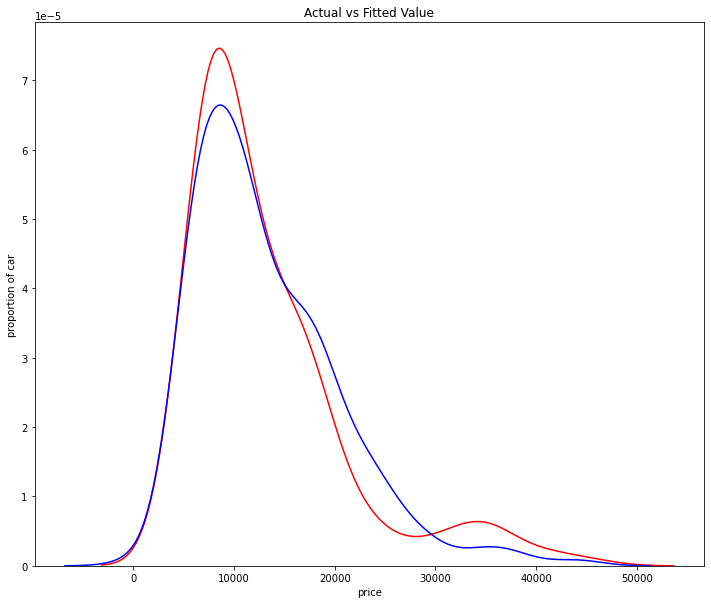

In [149]:
plt.figure(figsize = (width, height))
ax1 = sns.distplot(df['price'], hist = False, color = 'r', label = 'Actual Value')
sns.distplot(yhat, hist = False, color = 'b', label = "Fitted Value", ax = ax1)

plt.title('Actual vs Fitted Value')
plt.xlabel('price')
plt.ylabel('proportion of car')
plt.ylim(0,)

# polynominal regression and pipeline

- polynominal regression is a particular case of general linera regression model or multiple   regression
- we get non_linear regression by squarring or setting higher order terms of predictor variable

# Different orders of ploynominal regression
-  quadratic - 2nd order
    
    yhat = a+b1(x1)+b2(x2)^2
    
- cubic - 3rd order

   yhat = a+b1(x)+b2(x^2)+b3(x^3)
    
- higher order
   yhat = a1+b1(x)+b2(x2^2)+b3(x3^3)
    


In [150]:
def plotpolly(model, independent_variable, dependent_variable, name):
    x_new = np.linspace(15,55,100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable,'.',x_new, y_new,'-')
    plt.title('polynominal fit for price and length')
    ax =plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf
    plt.xlabel(name)
    plt.ylabel('price of cars')
    
    plt.show()
    plt.close()

In [151]:
x = df['highway-mpg']
y= df['price']

f = np.polyfit(x,y,3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


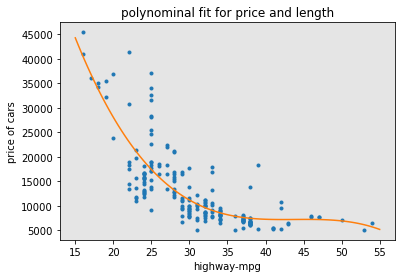

In [152]:
plotpolly(p,x,y,'highway-mpg')

In [153]:
x_new = np.linspace(15,55,100)
p(x_new)

array([44258.16161873, 42714.9848919 , 41215.17312753, 39758.11027931,
       38343.18030097, 36969.7671462 , 35637.25476871, 34345.02712221,
       33092.46816041, 31878.96183702, 30703.89210574, 29566.64292028,
       28466.59823434, 27403.14200164, 26375.65817588, 25383.53071077,
       24426.14356002, 23502.88067733, 22613.12601642, 21756.26353098,
       20931.67717473, 20138.75090137, 19376.86866462, 18645.41441817,
       17943.77211574, 17271.32571104, 16627.45915776, 16011.55640963,
       15423.00142034, 14861.1781436 , 14325.47053313, 13815.26254262,
       13329.93812579, 12868.88123634, 12431.47582798, 12017.10585442,
       11625.15526936, 11255.00802652, 10906.0480796 , 10577.6593823 ,
       10269.22588834,  9980.13155142,  9709.76032526,  9457.49616355,
        9222.72302   ,  9004.82484833,  8803.18560223,  8617.18923543,
        8446.21970161,  8289.6609545 ,  8146.8969478 ,  8017.31163521,
        7900.28897045,  7795.21290722,  7701.46739923,  7618.43640019,
      

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


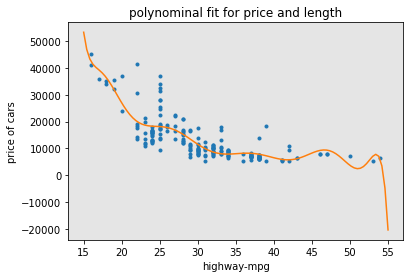

In [154]:
x = df['highway-mpg']
y= df['price']

f = np.polyfit(x,y,11)
p = np.poly1d(f)
print(p)

plotpolly(p,x,y,'highway-mpg')

# polynominal regressio for multivariant

- The example the 2nd order polynominal for two varianat

- yhat = a+b1(x1)+b2(x2)+b3(x1*x2)+b4(x1^2)+b5(x2^2)

- we can perform polynominal transform on mltiple feature we import the module polynominal feature

In [155]:
pr =  PolynomialFeatures(degree = 2)
pr

PolynomialFeatures()

In [156]:
z_pr = pr.fit_transform(z)
z_pr

array([[1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.1100e+02, 2.5480e+03, ..., 1.6900e+04, 3.5100e+03,
        7.2900e+02],
       [1.0000e+00, 1.5400e+02, 2.8230e+03, ..., 2.3104e+04, 3.9520e+03,
        6.7600e+02],
       ...,
       [1.0000e+00, 1.3400e+02, 3.0120e+03, ..., 2.9929e+04, 3.9790e+03,
        5.2900e+02],
       [1.0000e+00, 1.0600e+02, 3.2170e+03, ..., 2.1025e+04, 3.9150e+03,
        7.2900e+02],
       [1.0000e+00, 1.1400e+02, 3.0620e+03, ..., 1.9881e+04, 3.5250e+03,
        6.2500e+02]])

In [157]:
z.shape

(201, 4)

In [158]:
z_pr.shape

(201, 15)

# pipeline

Data pipeline simplify the  steps of processing the data we use the module pipeline
to create a pipeline we also use standard scaler as a step in our pipeline


In [159]:
Input = [('scale',StandardScaler()), ('polynomial',PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [160]:
z = z.astype('float')
pipe.fit(z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [161]:
ypipe = pipe.predict(z)
ypipe[0:4]

array([13103.37745014, 13103.37745014, 18228.50045451, 10392.95563313])

# measure for in-sample evaluation

- when evaluation our model not only do we want to visualise the result but we alse want a quantitive measure to determine how accurate the model is for important measures

- 1) R-squared
- 2)mean squared error

R-squared also known of co-efficient of determination is a measure to indicate how close is a data
is to fitted to a regression line

mean_ square error  measures the average of suare of the error that is the difference between acutal 
value and estimated value



In [162]:
mse = mean_squared_error(df['price'], yhat)
print('the mean square error is', mse)


the mean square error is 11976801.681229586


In [163]:
yhat

array([13699.00138847, 13699.00138847, 19055.18075089, 10621.20889105,
       15519.94133137, 13868.36830279, 15455.25561838, 15973.23070656,
       17613.77045652, 10722.84396625, 10722.84396625, 17804.39480539,
       18063.38234948, 19319.76390179, 26971.11365861, 27677.4433243 ,
       28193.25862258,   654.86828872,  5650.65102329,  5815.46127861,
        5480.05514112,  5370.86600641,  8740.86140012,  5799.37267027,
        5902.9676879 ,  5902.9676879 ,  9037.51985971, 11862.15740445,
       18769.27680226,  4812.50339522,  5694.28866511,  4007.72756456,
        6118.47574917,  6193.81758017,  6448.09625982,  6514.02036196,
        9478.50813756,  9728.07795277,  9798.71091934, 10118.91370112,
       11179.01261202, 10424.6666361 ,  9461.10677121, 12625.62913393,
       34469.01320724, 34469.01320724, 44000.60237653,  5263.48771758,
        5565.3510096 ,  5588.89533179,  5777.24990931,  5800.7942315 ,
        7337.88697675,  7337.88697675,  7361.43129894, 10540.42780386,
      

In [164]:
x = df[['highway-mpg']]
lm.fit(x, y)
print('the r-square value', lm.score(x,y))

the r-square value 0.4965911884339175


In [165]:
yhat = lm.predict(x)
yhat[0:4]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ])

In [166]:
mse = mean_squared_error(df['price'], yhat)
print('the mean square error is', mse)

the mean square error is 31635042.944639895


In [167]:
lm.fit(z,df['price'])
print('the rsquare value is', lm.score(z,df['price']))

the rsquare value is 0.8094130135602673


In [168]:
y_predict_multifit = lm.predict(z)
print(' the mean square value is', mean_squared_error(df['price'], y_predict_multifit))

 the mean square value is 11976801.681229586


In [169]:
r_square = r2_score(y, p(x))
print('the r-square value is', r_square)

the r-square value is 0.7023769088980322


# prediction and decision making

In [171]:


new_input = np.arange(1, 100, 1).reshape(-1, 1)


In [172]:
X = df[['highway-mpg']]
Y = df[['price']]

In [173]:
lm.fit(X, Y)
lm

LinearRegression()

In [174]:
yhat = lm.predict(new_input)
yhat[0:4]

array([[37601.57247984],
       [36779.83910151],
       [35958.10572319],
       [35136.37234487]])

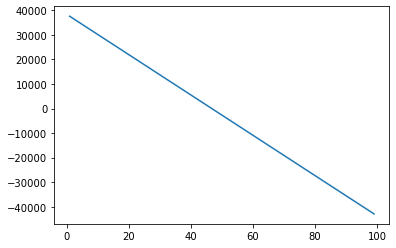

In [175]:
plt.plot(new_input, yhat)
plt.show()

# Decision making and good model fit

1) What is  a good r-square ?

when comparing model the model with higher r square value is a better fit for data

2) What is  a good mse ?

when comparing model the model with smallest mse value is a better fit for data



# Training and testing

In [176]:


y_data = df['price']
x_data =df.drop('price', axis = 1)

x_train, x_test, y_train,y_test = train_test_split(x_data, y_data, test_size= 0.10, random_state = 1)
print('number  of testing sample', y_test.shape[0])
print("no of trainning sample", y_train.shape[0])

number  of testing sample 21
no of trainning sample 180


In [177]:
x_data

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,sapiration_std,aspiration_turbo,price_binned
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,3.47,2.68,9.0,111,5000.0,21,27,1,0,low
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,3.47,2.68,9.0,111,5000.0,21,27,1,0,low
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,2.68,3.47,9.0,154,5000.0,19,26,1,0,low
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,3.19,3.40,10.0,102,5500.0,24,30,1,0,low
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,3.19,3.40,8.0,115,5500.0,18,22,1,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,3.78,3.15,9.5,114,5400.0,23,28,1,0,low
201,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.955556,...,3.78,3.15,8.7,160,5300.0,19,25,0,1,medium
202,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,3.58,2.87,8.8,134,5500.0,18,23,1,0,medium
203,-1,95,volvo,four,sedan,rwd,front,109.1,0.907256,0.956944,...,3.01,3.40,23.0,106,4800.0,26,27,0,1,medium


In [178]:
x_train1, x_test1, y_train1,y_test1 = train_test_split(x_data, y_data, test_size= 0.4, random_state = 0)
print('number  of testing sample', x_test1.shape[0])
print("no of trainning sample", x_train1.shape[0])

number  of testing sample 81
no of trainning sample 120


In [179]:
# fitting the model using linear regression
lre = LinearRegression()
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [180]:
lre.score(x_test[['horsepower']], y_test)

0.3634554596325089

In [181]:
lre.score(x_train[['horsepower']], y_train)

0.6621588065210514

In [182]:
lre.fit(x_train1[['horsepower']], y_train1)


LinearRegression()

In [183]:
lre.score(x_train1[['horsepower']], y_train1)

0.5756669207771248

In [184]:
lre.score(x_test1[['horsepower']], y_test1)

0.7140596789451211

# Cross Validation using 4 folds

In [185]:


rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv =4)
rcross

array([0.7747254 , 0.51722436, 0.74881624, 0.04792707])

In [186]:
# calculation average and mean of crposs_validation
print('the mean of the fold are', rcross.mean(), 'the std of cross are', rcross.std())

the mean of the fold are 0.5221732664777984 the std of cross are 0.29158341973020163


In [187]:
# negative scored error

-1*cross_val_score(lre, x_data[['horsepower']], y_data, cv =4, scoring ='neg_mean_squared_error')

array([20244958.23821451, 43740285.03051738, 12491753.70789968,
       17570582.82435501])

In [188]:
rc = cross_val_score(lre, x_data[['horsepower']], y_data, cv =2)
rc.mean()

0.517201659245971

In [189]:
yhat = cross_val_predict(lre, x_data[['horsepower']], y_data,cv =4)
yhat

array([14143.6442164 , 14143.6442164 , 20817.63619486, 12746.7621744 ,
       14764.48067952, 13988.43510063, 13988.43510063, 13988.43510063,
       18644.70857397, 12591.55305862, 12591.55305862, 15695.73537418,
       15695.73537418, 15695.73537418, 25163.49143664, 25163.49143664,
       25163.49143664,  4365.46992239,  7780.07046951,  7780.07046951,
        7469.65223795,  7469.65223795, 12746.7621744 ,  7469.65223795,
        7469.65223795,  7469.65223795, 12746.7621744 , 10573.83455351,
       19420.75415286,  5917.56108017,  8711.32516417,  6227.97931173,
        8711.32516417,  8711.32516417,  8711.32516417,  8711.32516417,
       10263.41632195, 10263.41632195, 10263.41632195, 10263.41632195,
       12591.55305862, 12436.34394285,  9021.74339573, 10884.25278507,
       24232.23674197, 24232.23674197, 37580.22069888,  7469.65223795,
        7469.65223795,  7469.65223795,  7469.65223795,  7192.64508882,
       12627.03163429, 12627.03163429, 12627.03163429, 18226.09655992,
      

# Under fitting and overfitting

- It turn out the test data sometimes referred to out of sample data so is much better
  to measure of how well our data perform in the real world . it turns out these difference
  are more apparnt in multiple linear regression and polynominal regression

In [190]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [191]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train
yhat_test= lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test

array([11350.45521266,  5884.59029431, 11207.42589659,  6640.92536133,
       15566.43146855,  6028.00695806, 18960.07057256, 11088.19662175,
       15600.1814176 ,  5724.40056613, 11346.06899279,  6582.96262769,
       15520.88932069, 17998.41254063, 12280.30851581, 14321.39602302,
        4820.98457242, 17618.51437556,  6533.81354758,  9373.33360027,
        9872.14649298])

# Distribution of Trained and Trainning Data Set

C:\Users\g\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\g\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


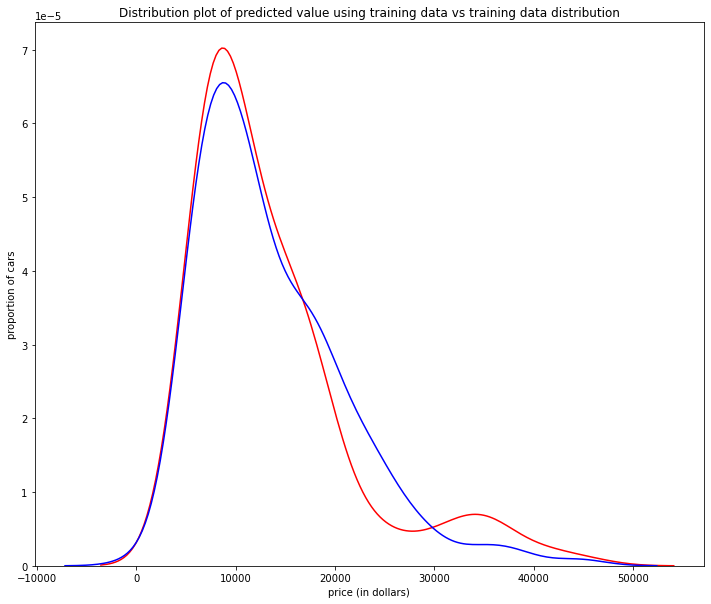

In [194]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width =12
    height = 10
    plt.figure(figsize = (width, height))
    ax1 = sns.distplot(RedFunction, hist = False, color = 'r', label =RedName)
    ax2 = sns.distplot(BlueFunction,hist = False, color = 'b', label =BlueName, ax = ax1)
    plt.title(Title)
    plt.xlabel('price (in dollars)')
    plt.ylabel('proportion of cars')
    plt.show()
    plt.close()
    
Title = 'Distribution plot of predicted value using training data vs training data distribution'

DistributionPlot(y_train, yhat_train,"actual values(Train)", "predicted value(train)", Title)

C:\Users\g\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\g\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


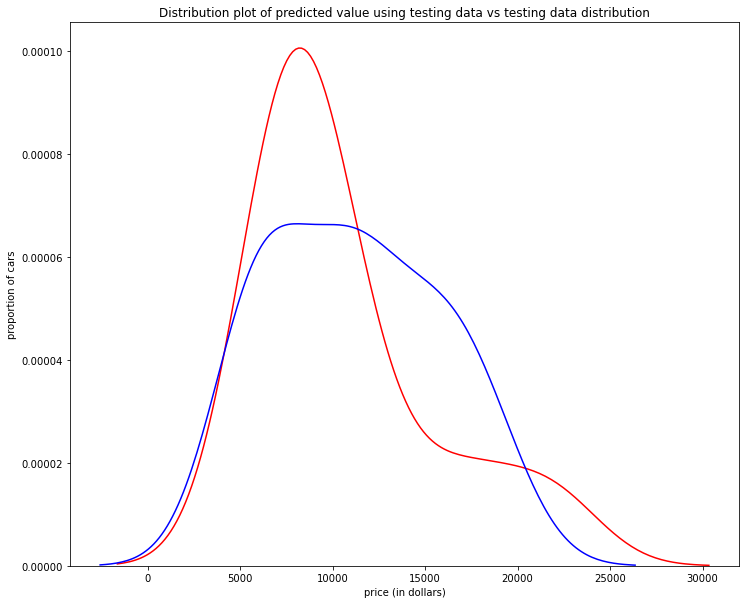

In [196]:
Title = 'Distribution plot of predicted value using testing data vs testing data distribution'

DistributionPlot(y_test, yhat_test,"actual values(Train)", "predicted value(train)", Title)

# Over Fitting

In [198]:

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.45, random_state = 0)


In [199]:
pr = PolynomialFeatures(degree = 5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [200]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)


LinearRegression()

In [201]:
yhat = poly.predict(x_test_pr)
yhat

array([   6724.76883773,    7303.51369408,   12213.86178144,
         18899.15190277,   19998.93409713,   10114.65301034,
         14131.31946286,    5938.49069927,   14844.40230811,
          6724.76883773,    9878.4940829 ,   18977.03677286,
          7911.9788936 ,    6580.62511896,   17336.08096947,
         14131.31946286,    7965.63817535,   14131.31946286,
         10347.54378054,    6406.27365245,    6406.27365245,
         14211.45336482,   26668.96397615,    6724.76883773,
          5996.60401166,   18977.03677286,   10114.65301034,
         11235.02926523,   16975.21736088,   26668.96397615,
         28266.96153207,   15876.65267135,    5938.49069927,
         12213.86178144,   13294.11626359,   10801.12684057,
         14131.31946286,   14492.67958622,   10801.12684057,
         12557.99451948,    6557.64193186,   14958.01862016,
         13294.11626359,   12213.86178144,   14555.24832219,
          7099.34061833,   16501.75235357,    6406.27365245,
          6406.27365245,

In [202]:
def pollyplot(xtrain, xtest,y_train, y_test,lr,poly_transform ):
    width = 12
    height = 10
    plt.figure(figsize= (width, height))
    
    xmax = max([xtrain.values.max(), xtest.values.max()])
    xmin = min([xtrain.values.min(), xtest.values.min()])
    x = np.arange(xmin, xmax, 0.1)
    
    plt.plot(xtrain, y_train, 'ro', label ='Trainning data')
    plt.plot(xtest, y_test, 'go', label = 'test data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1,1))), label = 'predicted function')
    plt.ylim([-10000, 60000])
    plt.ylabel('price')
    plt.legend()

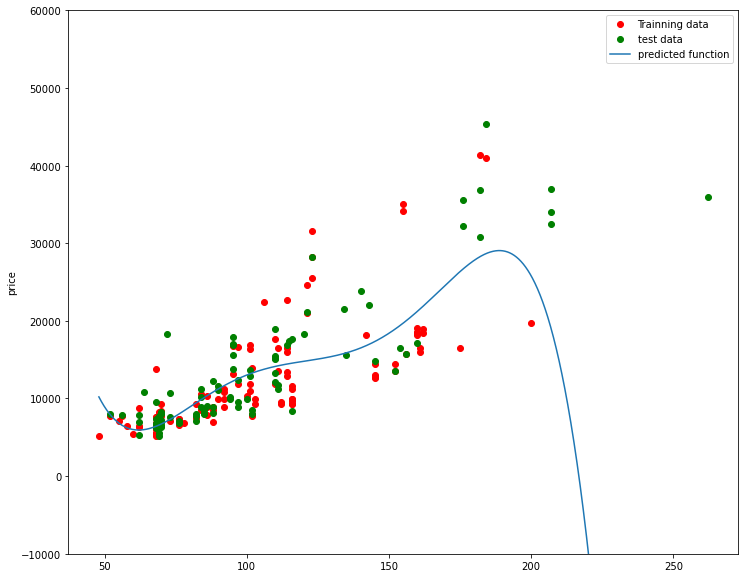

In [203]:
pollyplot(x_train[['horsepower']].astype('int64'), x_test[['horsepower']].astype('int64'), y_train, y_test, poly, pr)

In [204]:
y = x_test[['horsepower']].astype('int64')
z = x_train[['horsepower']].astype('int64')
m = max([y.values.max(), z.values.max()])
m

262

In [205]:
poly.score(x_train_pr, y_train)

0.5570463604059155

In [206]:
poly.score(x_test_pr, y_test)

-29.69540756674259


- R_ SCORE VAlue for traning data set is 0.5570
- R-score for teest data set is -29.69
which implies that  the lower the r2 is a sign of overfitting the worse the model is
- changing the order of polynominal


Text(3, 0.75, 'maximum r^2')

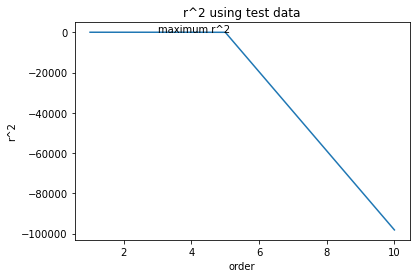

In [207]:
rsqut_test = []

order = [1, 2, 3, 4, 5, 10]
for n in order:
    pr = PolynomialFeatures(degree= n)
    x_train_pr = pr.fit_transform(x_train[['horsepower']].astype('int64'))
    x_test_pr = pr.fit_transform(x_test[['horsepower']].astype('int64'))
    lr.fit(x_train_pr, y_train)
    rsqut_test.append(lr.score(x_test_pr, y_test))
    
plt.plot(order, rsqut_test)
plt.xlabel('order')
plt.ylabel('r^2')
plt.title('r^2 using test data')
plt.text(3, 0.75, 'maximum r^2')    

# Ridge REgression 

Ridge egression can be uses to show how parameter alpha changes the model


In [209]:
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'highway-mpg', 'normalized-losses', 'symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'highway-mpg', 'normalized-losses', 'symboling']])

In [210]:
ridgemodel = Ridge(alpha=1)
ridgemodel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [211]:
yhat = ridgemodel.predict(x_test_pr)

In [212]:
print('predicted:', yhat[0:4])
print('test set:', y_test[0:4].values)

predicted: [ 6561.6569875   8514.28497372 18375.41342239 19929.06308511]
test set: [ 6295 10698 13860 13499]


In [213]:
resq_test = []
resq_train = []
dummy = []
Alpha = 10*np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    ridgemodel= Ridge(alpha = alpha)
    ridgemodel.fit(x_train_pr, y_train)
    test_score, train_score =ridgemodel.score(x_test_pr, y_test), ridgemodel.score(x_train_pr, y_train)
    pbar.set_postfix({'test score': test_score, 'train score': train_score})
    resq_test.append(test_score)
    resq_train.append(train_score)

100%|██████████████████████████████████████████| 1000/1000 [00:11<00:00, 87.60it/s, test score=0.565, train score=0.85]


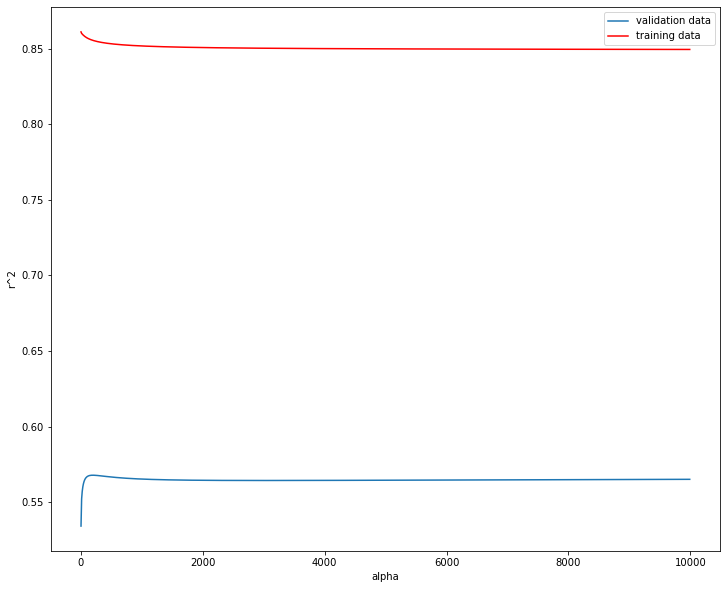

In [215]:
width = 12
height = 10
plt.figure(figsize = (width, height))
plt.plot(Alpha, resq_test, label = 'validation data')
plt.plot(Alpha, resq_train, 'r', label = 'training data')
plt.xlabel('alpha')
plt.ylabel('r^2')
plt.legend()

- THE blue line represent the r^2 of validation data and red line represent the  different value of alpha

- The redline represent the r^2 of trainind data as alpha increases the r^2 decreses therefore the
  model perform wrost in trainning data


# grid search
- the grid search help us to finding the best hyperparameter


In [218]:


parameter = [{'alpha' : [0.001, 0.1, 1, 10,100, 1000, 10000, 100000]}]
parameter

rr = Ridge()
rr


Ridge()

In [219]:
grid1 = GridSearchCV(rr, parameter, cv=4)
grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size','highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000,
                                    100000]}])

In [220]:
bestrr = grid1.best_estimator_
bestrr

Ridge(alpha=10000)

In [221]:
bestrr.score(x_test[['horsepower', 'curb-weight', 'engine-size','highway-mpg']], y_test)

0.8412088001897691

- Hence we can perdict a great model by using horsepower', 'curb-weight', 'engine-size','highway-mpg'